In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from hydramuscle.model.smc import SMC
from hydramuscle.model.layer import Layer

In [4]:
numx = 30
numy = 60

In [5]:
T = 50
dt = 0.0002
save_interval=500
smc = SMC(T=T, dt=dt, k_ipr=0.2, s0=100, k_deg=0.05)

### k_ipr & k_deg

In [6]:
k_ipr_list = np.arange(0.05, 0.55, 0.05)
k_deg_list = np.arange(0.01, 0.11, 0.01)

In [7]:
ca_2d_list = []

for i, k_ipr in enumerate(k_ipr_list):
    
    ca_list = []
    print(str(i + 1) + '/' + str(len(k_ipr_list)))
    
    for j, k_deg in enumerate(k_deg_list):
        
        smc._k_ipr = k_ipr
        smc._k_deg = k_deg

        layer = Layer(smc, 
                      numx=numx, 
                      numy=numy, 
                      gip3x=0.1, 
                      gip3y=2.0, 
                      gcx=1000, 
                      gcy=1000,
                      save_interval=save_interval)

        layer.set_stim_pattern(pathway='slow',
                               xmin=14, xmax=16, ymin=29, ymax=31,
                               stim_times=[0])

        sol = layer.run(save_all=True)

        # Extract calcium data
        calcium = sol[:, :numx * numy].reshape(-1, numx, numy)
        ca_list.append(calcium)
        
    ca_2d_list.append(ca_list)

  0%|          | 282/250000 [00:00<01:28, 2814.16it/s]

1/10


  0%|          | 282/250000 [00:00<01:28, 2809.79it/s]

2/10


  0%|          | 283/250000 [00:00<01:28, 2824.52it/s]

3/10


  0%|          | 291/250000 [00:00<01:26, 2902.69it/s]

4/10


  0%|          | 297/250000 [00:00<01:24, 2964.23it/s]

5/10


  0%|          | 292/250000 [00:00<01:25, 2917.31it/s]

6/10


  0%|          | 285/250000 [00:00<01:27, 2842.38it/s]

7/10


  0%|          | 287/250000 [00:00<01:27, 2864.25it/s]

8/10


  0%|          | 309/250000 [00:00<01:20, 3088.45it/s]

9/10


  0%|          | 305/250000 [00:00<01:22, 3039.96it/s]

10/10


100%|██████████| 250000/250000 [01:20<00:00, 3086.71it/s]


In [15]:
# Calculate the range for each calcium data

wrange_2d_list = np.zeros((len(ca_2d_list), len(ca_2d_list[0])))
threshold = 0.06

for i, ca_list in enumerate(ca_2d_list):
    for j, calcium in enumerate(ca_list):
        ca_lon_half = calcium[:, numx//2, numy//2:]
        # Calculate velocity
        wavefronts = []
        for t in np.arange(0, T, dt * save_interval):
            concentrs = ca_lon_half[int(t / dt / save_interval)]
            for k in range(numy // 2 - 1, -1, -1):
                if concentrs[k] > threshold:
                    break
            wavefronts.append(k) 
        wrange = max(wavefronts)
        wrange_2d_list[i, j] = wrange

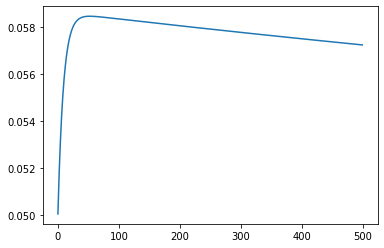

In [16]:
plt.plot(ca_2d_list[-1][-1][:, 0, 30])

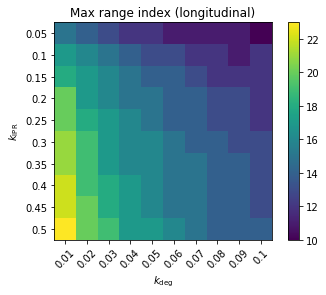

In [18]:
# Plot imshow

plt.figure()
plt.imshow(wrange_2d_list)
plt.xticks(range(10), np.round(k_deg_list, 4), rotation=45)
plt.yticks(range(10), np.round(k_ipr_list, 4))
plt.xlabel('$k_\mathrm{deg}$')
plt.ylabel('$k_\mathrm{IPR}$')
cbar = plt.colorbar()
# cbar.set_label('max wavefront #')
plt.title('Max range index (longitudinal)')
plt.savefig('../../results/figures/kipr-kdeg.pdf', bbox_inches='tight')
plt.show()

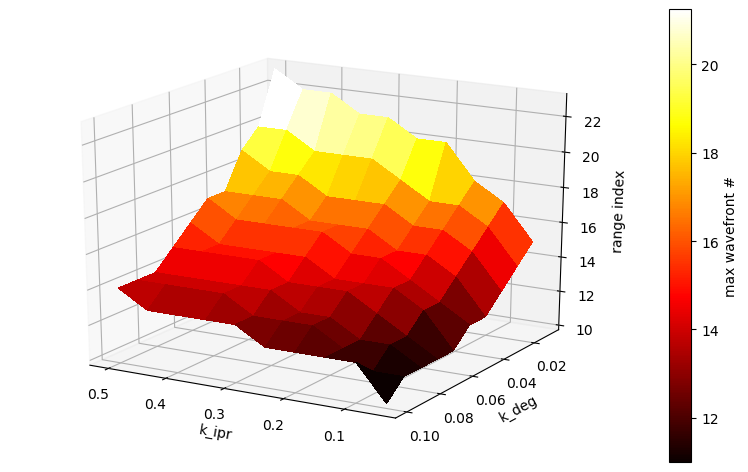

In [19]:
# Plot surface

fig = plt.figure(figsize=(10,6), dpi=100)
ax = plt.axes(projection='3d')
X = np.outer(np.array(k_ipr_list), np.ones(len(k_deg_list)))
Y = np.outer(np.ones(len(k_ipr_list)), k_deg_list)
surf = ax.plot_surface(X, Y, wrange_2d_list, cmap='hot', antialiased=False)
ax.set_xlabel('k_ipr')
ax.set_ylabel('k_deg')
ax.set_zlabel('range index')
ax.view_init(20, 120)
cbar = fig.colorbar(surf)
cbar.set_label('max wavefront #')
# plt.savefig('../../results/figures/kipr-kdeg-surface.pdf', bbox_inches='tight')
plt.show()

### k_SERCA & k_PMCA

In [20]:
k_serca_list = np.arange(0.1, 1.1, 0.1)
k_pmca_list = np.arange(0.1, 1.1, 0.1)

In [21]:
ca_2d_list = []

for i, k_serca in enumerate(k_serca_list):
    
    ca_list = []
    print(str(i + 1) + '/' + str(len(k_serca_list)))
    
    for j, k_pmca in enumerate(k_pmca_list):
        
        smc._k_serca = k_serca
        smc._k_pmca = k_pmca

        layer = Layer(smc, 
                      numx=numx, 
                      numy=numy, 
                      gip3x=0.1, 
                      gip3y=2.0, 
                      gcx=1000, 
                      gcy=1000,
                      save_interval=save_interval)

        layer.set_stim_pattern(pathway='slow',
                               xmin=14, xmax=16, ymin=29, ymax=31,
                               stim_times=[0])

        sol = layer.run(save_all=True)

        # Extract calcium data
        calcium = sol[:, :numx * numy].reshape(-1, numx, numy)
        ca_list.append(calcium)
        
    ca_2d_list.append(ca_list)

  0%|          | 267/250000 [00:00<01:33, 2663.56it/s]

1/10


  0%|          | 303/250000 [00:00<01:22, 3027.45it/s]

2/10


  0%|          | 304/250000 [00:00<01:22, 3030.85it/s]

3/10


  0%|          | 302/250000 [00:00<01:22, 3015.19it/s]

4/10


  0%|          | 302/250000 [00:00<01:22, 3016.44it/s]

5/10


  0%|          | 304/250000 [00:00<01:22, 3039.56it/s]

6/10


  0%|          | 304/250000 [00:00<01:22, 3036.20it/s]

7/10


  0%|          | 307/250000 [00:00<01:21, 3068.78it/s]

8/10


  0%|          | 306/250000 [00:00<01:21, 3057.96it/s]

9/10


  0%|          | 288/250000 [00:00<01:26, 2873.44it/s]

10/10


100%|██████████| 250000/250000 [01:22<00:00, 3041.53it/s]


In [22]:
# Calculate the range for each calcium data

wrange_2d_list = np.zeros((len(ca_2d_list), len(ca_2d_list[0])))
threshold = 0.06

for i, ca_list in enumerate(ca_2d_list):
    for j, calcium in enumerate(ca_list):
        ca_lon_half = calcium[:, numx//2, numy//2:]
        # Calculate velocity
        wavefronts = []
        for t in np.arange(0, T, dt * save_interval):
            concentrs = ca_lon_half[int(t / dt / save_interval)]
            for k in range(numy // 2 - 1, -1, -1):
                if concentrs[k] > threshold:
                    break
            wavefronts.append(k) 
        wrange = max(wavefronts)
        wrange_2d_list[i, j] = wrange

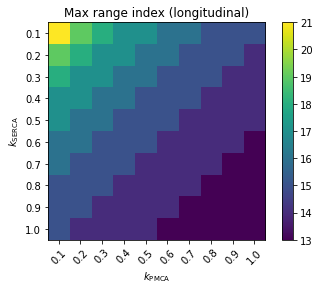

In [59]:
# Plot imshow

plt.figure()
plt.imshow(wrange_2d_list)
plt.xticks(range(10), np.round(k_pmca_list, 4), rotation=45)
plt.yticks(range(10), np.round(k_serca_list, 4))
plt.xlabel('$k_\mathrm{PMCA}$')
plt.ylabel('$k_\mathrm{SERCA}$')
cbar = plt.colorbar()
# cbar.set_label('max wavefront #')
plt.title('Max range index (longitudinal)')
# plt.savefig('../../results/figures/kserca-kpmca.pdf', bbox_inches='tight')
plt.show()

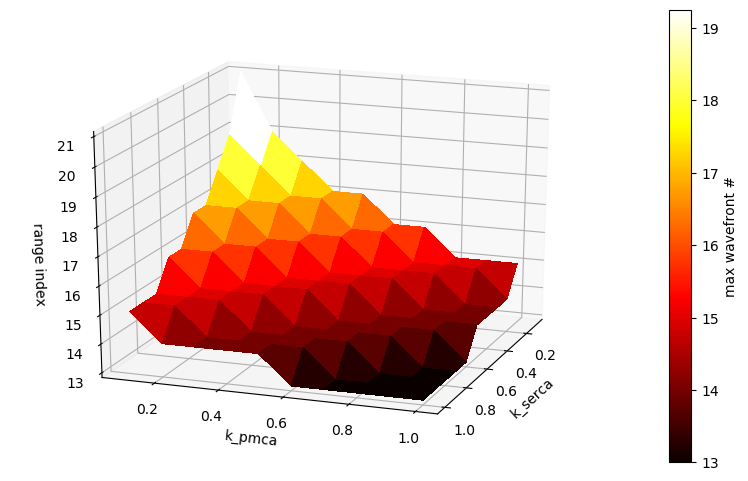

In [60]:
# Plot surface

fig = plt.figure(figsize=(10,6), dpi=100)
ax = plt.axes(projection='3d')
X = np.outer(np.array(k_serca_list), np.ones(len(k_pmca_list)))
Y = np.outer(np.ones(len(k_serca_list)), k_pmca_list)
surf = ax.plot_surface(X, Y, wrange_2d_list, cmap='hot', antialiased=False)
ax.set_xlabel('k_serca')
ax.set_ylabel('k_pmca')
ax.set_zlabel('range index')
ax.view_init(20, 20)
cbar = fig.colorbar(surf)
cbar.set_label('max wavefront #')
plt.savefig('../../results/figures/kserca-kpmca-surface.pdf', bbox_inches='tight')
plt.show()